In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import pmdarima as pm
from sklearn.metrics import mean_squared_error

df = pd.read_csv('hw3_Data2/train.csv')
train_date = list(df.Date)
train_close = list(df.Close)
# train_date_int = [(dt.strptime(i, "%Y-%m-%d") - (dt.strptime(train_date[0], "%Y-%m-%d"))).days for i in train_date]

df = pd.read_csv('hw3_Data2/test.csv')
test_date = list(df.Date)
test_close = list(df.Close)
# test_date_int = [(dt.strptime(i, "%Y-%m-%d") - (dt.strptime(train_date[0], "%Y-%m-%d"))).days for i in test_date]

model = pm.arima.ARIMA((0,1,0), (0,1,0,31))
model.fit(train_close)
forecasts = model.predict(len(test_close))

print(mean_squared_error(test_close, forecasts))

61162.46526997664


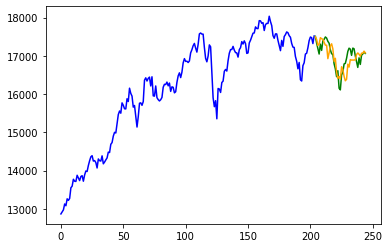

In [2]:
plt.plot(range(len(train_close)), train_close, c='blue')
plt.plot(range(len(train_close), len(train_close) + len(test_close)), forecasts, c='green')
plt.plot(range(len(train_close), len(train_close) + len(test_close)), test_close, c='orange')
plt.show()